## Importing the relevant packages


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.arima.model import ARIMA as ARMA
from scipy.stats.distributions import chi2
import statsmodels.tsa.stattools as sts 
import seaborn as sns
sns.set()

C:\Users\Sruja\AppData\Local\Temp\ipykernel_1792\192206185.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Importing the Data and Pre-processing 

In [2]:
raw_csv_data = pd.read_csv("Index2018.csv") 
df_comp=raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True)
df_comp.set_index("date", inplace=True)
df_comp=df_comp.asfreq('b')
df_comp=df_comp.fillna(method='ffill')

C:\Users\Sruja\AppData\Local\Temp\ipykernel_1792\2050007954.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_comp=df_comp.fillna(method='ffill')


In [3]:
df_comp['market_value']=df_comp.ftse

In [4]:
del df_comp['spx']
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

## LLR Test

In [5]:
def LLR_test(mod_1, mod_2, DF=1):
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf
    LR = (2*(L2-L1))
    p = chi2.sf(LR, DF).round(3)
    return p

## The DF-Test

In [6]:
sts.adfuller(df.market_value)

(-1.9041551418836855,
 0.33010893277028364,
 6,
 5014,
 {'1%': -3.4316548765428174,
  '5%': -2.8621166146845334,
  '10%': -2.5670769326348926},
 54854.15304507557)

## Using Returns

In [7]:
df['returns'] = df.market_value.pct_change(1).mul(100)
df = df.iloc[1:]

C:\Users\Sruja\AppData\Local\Temp\ipykernel_1792\767974315.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['returns'] = df.market_value.pct_change(1).mul(100)


In [8]:
sts.adfuller(df.returns)

(-12.770265719497253,
 7.798058336037657e-24,
 32,
 4987,
 {'1%': -3.431661944885779,
  '5%': -2.8621197374408225,
  '10%': -2.5670785949998973},
 15696.767245697501)

## ACF and PACF for Returns

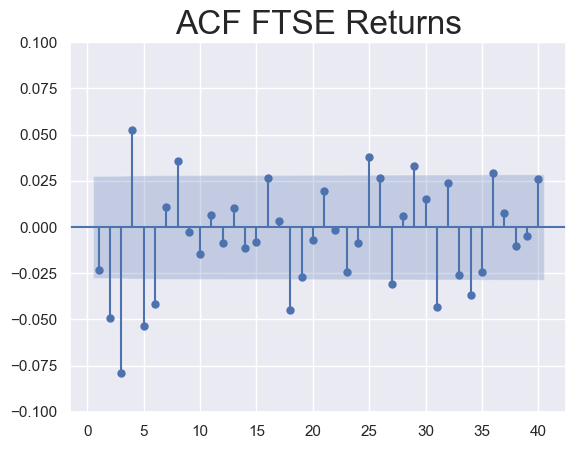

In [9]:
sgt.plot_acf(df.returns, lags=40, zero = False)
plt.title("ACF FTSE Returns", size=24)
plt.ylim(-0.1,0.1)
plt.show()

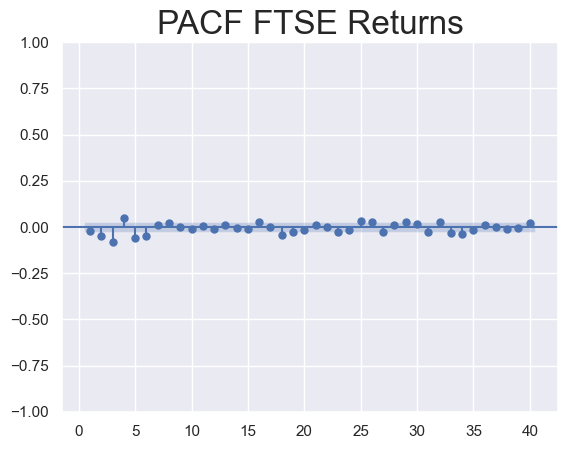

In [10]:
sgt.plot_pacf(df.returns, lags = 40, zero = False, method = ('ols'))
plt.title("PACF FTSE Returns", size=24)
plt.show()

## AR(1) for Returns

In [11]:
model_ret_ar_1 = ARMA(df.returns, order = (1,0,0))

In [12]:
results_ret_ar_1 = model_ret_ar_1.fit()

In [13]:
results_ret_ar_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -7929.749
Date:                Fri, 01 Mar 2024   AIC                          15865.497
Time:                        15:11:11   BIC                          15885.061
Sample:                    01-10-1994   HQIC                         15872.353
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0188      0.016      1.143      0.253      -0.013       0.051
ar.L1         -0.0230      0.009     -2.697      0.007      -0.040      -0.006
sigma2         1.3790      0.014    100.092      0.000       1.352       1.406
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              7872.72
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               2.04   Skew:                            -0.03
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Higher-Lag AR Models for Returns

In [14]:
model_ret_ar_2 = ARMA(df.returns, order = (2,0,0))
results_ret_ar_2 = model_ret_ar_2.fit()
results_ret_ar_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -7923.456
Date:                Fri, 01 Mar 2024   AIC                          15854.911
Time:                        15:11:11   BIC                          15880.996
Sample:                    01-10-1994   HQIC                         15864.052
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0188      0.016      1.194      0.233      -0.012       0.050
ar.L1         -0.0242      0.009     -2.799      0.005      -0.041      -0.007
ar.L2         -0.0500      0.008     -6.371      0.000      -0.065      -0.035
sigma2         1.3756      0.014     99.592      0.000       1.348       1.403
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):              7730.29
Prob(Q):                              0.77   Prob(JB):                         0.00
Heteroskedasticity (H):               2.03   Skew:                            -0.06
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [15]:
LLR_test(model_ret_ar_1, model_ret_ar_2)

0.0

In [16]:
model_ret_ar_3 = ARMA(df.returns, order = (3,0,0))
results_ret_ar_3 = model_ret_ar_3.fit()
results_ret_ar_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(3, 0, 0)   Log Likelihood               -7906.738
Date:                Fri, 01 Mar 2024   AIC                          15823.477
Time:                        15:11:13   BIC                          15856.083
Sample:                    01-10-1994   HQIC                         15834.902
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.015      1.272      0.203      -0.010       0.048
ar.L1         -0.0283      0.009     -3.199      0.001      -0.046      -0.011
ar.L2         -0.0521      0.008     -6.684      0.000      -0.067      -0.037
ar.L3         -0.0815      0.008    -10.192      0.000      -0.097      -0.066
sigma2         1.3664      0.014     94.518      0.000       1.338       1.395
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):              6859.16
Prob(Q):                              0.79   Prob(JB):                         0.00
Heteroskedasticity (H):               2.02   Skew:                            -0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [17]:
LLR_test(model_ret_ar_2, model_ret_ar_3)

0.0

In [18]:
model_ret_ar_4 = ARMA(df.returns, order = (4,0,0))
results_ret_ar_4 = model_ret_ar_4.fit()
print(results_ret_ar_4.summary())
print ("LLR test: " + str(LLR_test(model_ret_ar_3, model_ret_ar_4)))

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(4, 0, 0)   Log Likelihood               -7901.330
Date:                Fri, 01 Mar 2024   AIC                          15814.661
Time:                        15:11:14   BIC                          15853.788
Sample:                    01-10-1994   HQIC                         15828.371
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0188      0.016      1.208      0.227      -0.012       0.049
ar.L1         -0.0245      0.009     -2.770      0.006      -0.042      -0.007
ar.L2         -0.0496      0.008     -6.327      0.0

In [19]:
model_ret_ar_5 = ARMA(df.returns, order = (5,0,0))
results_ret_ar_5 = model_ret_ar_5.fit()
print(results_ret_ar_5.summary())
print ("LLR test: " + str(LLR_test(model_ret_ar_4, model_ret_ar_5)))

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(5, 0, 0)   Log Likelihood               -7892.390
Date:                Fri, 01 Mar 2024   AIC                          15798.779
Time:                        15:11:16   BIC                          15844.428
Sample:                    01-10-1994   HQIC                         15814.775
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.015      1.273      0.203      -0.010       0.048
ar.L1         -0.0217      0.009     -2.396      0.017      -0.040      -0.004
ar.L2         -0.0544      0.008     -6.826      0.0

In [20]:
model_ret_ar_6 = ARMA(df.returns, order = (6,0,0))
results_ret_ar_6 = model_ret_ar_6.fit()
print(results_ret_ar_6.summary())
print ("LLR test: " + str(LLR_test(model_ret_ar_5, model_ret_ar_6)))

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(6, 0, 0)   Log Likelihood               -7886.945
Date:                Fri, 01 Mar 2024   AIC                          15789.890
Time:                        15:11:20   BIC                          15842.059
Sample:                    01-10-1994   HQIC                         15808.170
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.014      1.324      0.186      -0.009       0.047
ar.L1         -0.0245      0.009     -2.640      0.008      -0.043      -0.006
ar.L2         -0.0523      0.008     -6.505      0.0

In [21]:
model_ret_ar_7 = ARMA(df.returns, order = (7,0,0))
results_ret_ar_7 = model_ret_ar_7.fit()
results_ret_ar_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(7, 0, 0)   Log Likelihood               -7886.647
Date:                Fri, 01 Mar 2024   AIC                          15791.294
Time:                        15:11:23   BIC                          15849.985
Sample:                    01-10-1994   HQIC                         15811.860
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.015      1.304      0.192      -0.010       0.047
ar.L1         -0.0240      0.009     -2.579      0.010      -0.042      -0.006
ar.L2         -0.0517      0.008     -6.375      0.000      -0.068      -0.036
ar.L3         -0.0874      0.008    -10.725      0.000      -0.103      -0.071
ar.L4          0.0433      0.008      5.183      0.000       0.027       0.060
ar.L5         -0.0601      0.008     -7.463      0.000      -0.076      -0.044
ar.L6         -0.0463      0.009     -5.173      0.000      -0.064      -0.029
ar.L7          0.0109      0.009      1.205      0.228      -0.007       0.029
sigma2         1.3555      0.015     91.777      0.000       1.327       1.384
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              6448.20
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               2.00   Skew:                            -0.19
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [22]:
print (LLR_test(model_ret_ar_6, model_ret_ar_7))

0.44


## Normalizing Values

In [23]:
benchmark = df.market_value.iloc[0]

In [24]:
df['norm'] = df.market_value.div(benchmark).mul(100)

In [25]:
sts.adfuller(df.norm)

(-1.8928710132672346,
 0.3354222074330073,
 6,
 5013,
 {'1%': -3.431655136974821,
  '5%': -2.8621167297421373,
  '10%': -2.567076993884522},
 19553.90073102193)

In [26]:
bench_ret = df.returns.iloc[0]
df['norm_ret'] = df.returns.div(bench_ret).mul(100)
sts.adfuller(df.norm_ret)

(-12.770265719497262,
 7.798058336037265e-24,
 32,
 4987,
 {'1%': -3.431661944885779,
  '5%': -2.8621197374408225,
  '10%': -2.5670785949998973},
 80114.49116124898)

## Normalized Returns

In [27]:
model_norm_ret_ar_1 = ARMA (df.norm_ret, order=(1,0,0))
results_norm_ret_ar_1 = model_norm_ret_ar_1.fit()
results_norm_ret_ar_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               norm_ret   No. Observations:                 5020
Model:                 ARIMA(1, 0, 0)   Log Likelihood              -40351.743
Date:                Fri, 01 Mar 2024   AIC                          80709.487
Time:                        15:11:26   BIC                          80729.050
Sample:                    01-10-1994   HQIC                         80716.342
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.9731     10.476     -1.143      0.253     -32.506       8.560
ar.L1         -0.0230      0.009     -2.697      0.007      -0.040      -0.006
sigma2      5.617e+05   5612.960    100.071      0.000    5.51e+05    5.73e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              7872.68
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               2.04   Skew:                             0.03
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [28]:
model_norm_ret_ar_2 = ARMA(df.norm_ret, order=(2,0,0))
results_norm_ret_ar_2 = model_norm_ret_ar_2.fit()
results_norm_ret_ar_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               norm_ret   No. Observations:                 5020
Model:                 ARIMA(2, 0, 0)   Log Likelihood              -40345.450
Date:                Fri, 01 Mar 2024   AIC                          80698.901
Time:                        15:11:27   BIC                          80724.986
Sample:                    01-10-1994   HQIC                         80708.041
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.9731     10.050     -1.191      0.234     -31.671       7.725
ar.L1         -0.0242      0.009     -2.797      0.005      -0.041      -0.007
ar.L2         -0.0500      0.008     -6.368      0.000      -0.065      -0.035
sigma2      5.603e+05   5628.139     99.561      0.000    5.49e+05    5.71e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):              7730.40
Prob(Q):                              0.77   Prob(JB):                         0.00
Heteroskedasticity (H):               2.03   Skew:                             0.06
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [29]:
model_norm_ret_ar_7 = ARMA(df.norm_ret, order=(7,0,0))
results_norm_ret_ar_7 = model_norm_ret_ar_7.fit()
results_norm_ret_ar_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               norm_ret   No. Observations:                 5020
Model:                 ARIMA(7, 0, 0)   Log Likelihood              -40308.642
Date:                Fri, 01 Mar 2024   AIC                          80635.285
Time:                        15:11:27   BIC                          80693.975
Sample:                    01-10-1994   HQIC                         80655.851
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.9731      9.262     -1.293      0.196     -30.126       6.179
ar.L1         -0.0240      0.009     -2.577      0.010      -0.042      -0.006
ar.L2         -0.0517      0.008     -6.370      0.000      -0.068      -0.036
ar.L3         -0.0874      0.008    -10.717      0.000      -0.103      -0.071
ar.L4          0.0433      0.008      5.178      0.000       0.027       0.060
ar.L5         -0.0601      0.008     -7.457      0.000      -0.076      -0.044
ar.L6         -0.0463      0.009     -5.169      0.000      -0.064      -0.029
ar.L7          0.0109      0.009      1.204      0.228      -0.007       0.029
sigma2      5.524e+05   6023.895     91.707      0.000    5.41e+05    5.64e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              6448.21
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               2.00   Skew:                             0.19
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Analysing the Residuals

In [30]:
df['res_ret'] = results_ret_ar_6.resid

In [31]:
df.res_ret.mean()

-4.8530411809817385e-05

In [32]:
df.res_ret.var()

1.35598021287152

In [33]:
sts.adfuller(df.res_ret)

(-70.7841183611819,
 0.0,
 0,
 5019,
 {'1%': -3.4316535759402753,
  '5%': -2.8621160400844468,
  '10%': -2.567076626752987},
 15692.570807333244)

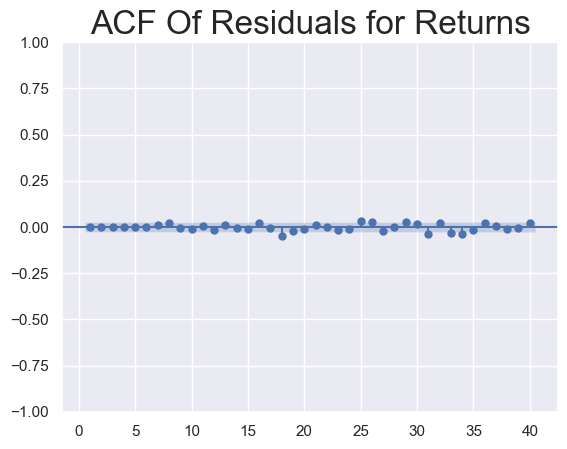

In [34]:
sgt.plot_acf(df.res_ret, zero = False, lags = 40)
plt.title("ACF Of Residuals for Returns",size=24)
plt.show()

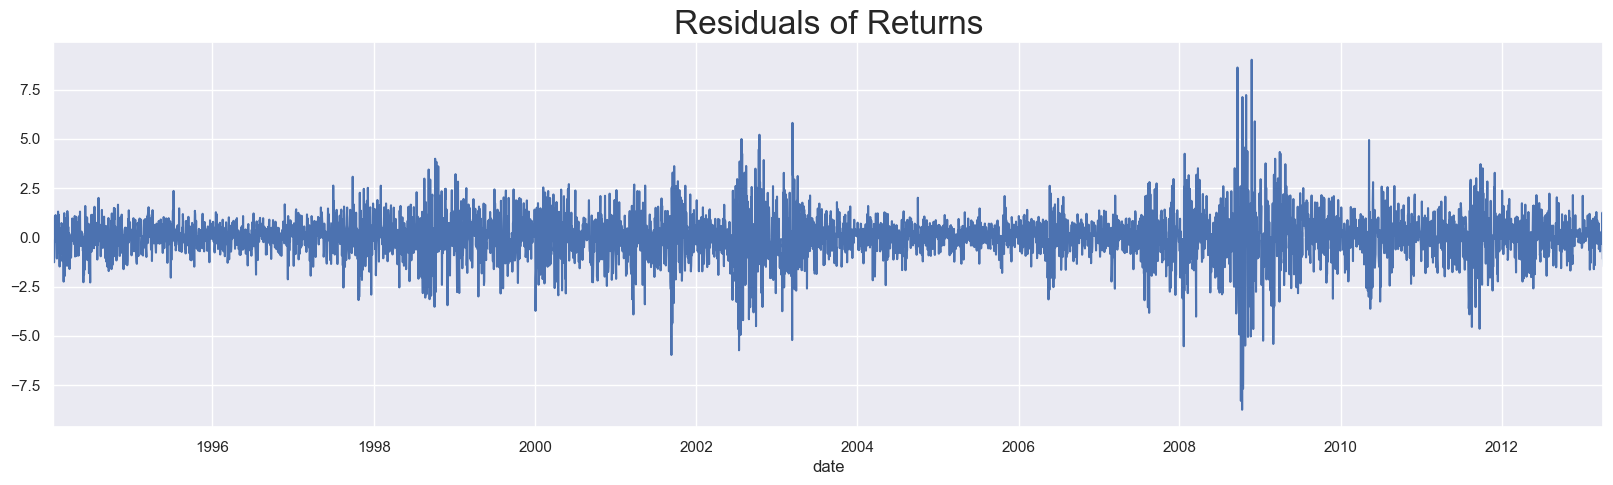

In [35]:
df.res_ret.plot(figsize=(20,5))
plt.title("Residuals of Returns", size=24)
plt.show()

# MA model

In [36]:
df['returns'] = df.market_value.pct_change(1).mul(100)

In [37]:
model_ret_ma_1 = ARMA(df.returns[1:], order=(0,0,1))
results_ret_ma_1 = model_ret_ma_1.fit()
results_ret_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 5019
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -7928.501
Date:                Fri, 01 Mar 2024   AIC                          15863.003
Time:                        15:11:29   BIC                          15882.566
Sample:                    01-11-1994   HQIC                         15869.858
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0188      0.016      1.148      0.251      -0.013       0.051
ma.L1         -0.0258      0.009     -3.021      0.003      -0.042      -0.009
sigma2         1.3792      0.014     99.965      0.000       1.352       1.406
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              7846.66
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               2.04   Skew:                            -0.03
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [38]:
model_ret_ma_2 = ARMA(df.returns[1:], order=(0,0,2))
results_ret_ma_2 = model_ret_ma_2.fit()
print(results_ret_ma_2.summary())
print ("\nLLR test p-value: " + str(LLR_test(model_ret_ma_1, model_ret_ma_2)))

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5019
Model:                 ARIMA(0, 0, 2)   Log Likelihood               -7921.760
Date:                Fri, 01 Mar 2024   AIC                          15851.521
Time:                        15:11:30   BIC                          15877.605
Sample:                    01-11-1994   HQIC                         15860.661
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.016      1.207      0.227      -0.012       0.049
ma.L1         -0.0327      0.009     -3.764      0.000      -0.050      -0.016
ma.L2         -0.0503      0.008     -6.421      0.0

In [39]:
model_ret_ma_3 = ARMA(df.returns[1:], order=(0,0,3))
results_ret_ma_3 = model_ret_ma_3.fit()
print(results_ret_ma_3.summary())
print ("\nLLR test p-value: " + str(LLR_test(model_ret_ma_2, model_ret_ma_3)))

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5019
Model:                 ARIMA(0, 0, 3)   Log Likelihood               -7903.214
Date:                Fri, 01 Mar 2024   AIC                          15816.429
Time:                        15:11:31   BIC                          15849.034
Sample:                    01-11-1994   HQIC                         15827.854
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0190      0.015      1.299      0.194      -0.010       0.048
ma.L1         -0.0203      0.009     -2.336      0.019      -0.037      -0.003
ma.L2         -0.0557      0.008     -7.035      0.0

In [40]:
model_ret_ma_4 = ARMA(df.returns[1:], order=(0,0,4))
results_ret_ma_4 = model_ret_ma_4.fit()
print(results_ret_ma_4.summary())
print ("\nLLR test p-value: " + str(LLR_test(model_ret_ma_3, model_ret_ma_4)))

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5019
Model:                 ARIMA(0, 0, 4)   Log Likelihood               -7897.656
Date:                Fri, 01 Mar 2024   AIC                          15807.312
Time:                        15:11:33   BIC                          15846.438
Sample:                    01-11-1994   HQIC                         15821.022
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.015      1.239      0.215      -0.011       0.049
ma.L1         -0.0203      0.009     -2.242      0.025      -0.038      -0.003
ma.L2         -0.0551      0.008     -6.840      0.0

In [41]:
model_ret_ma_5 = ARMA(df.returns[1:], order=(0,0,5))
results_ret_ma_5 = model_ret_ma_5.fit()
print(results_ret_ma_5.summary())
print ("\nLLR test p-value: " + str(LLR_test(model_ret_ma_4, model_ret_ma_5)))

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5019
Model:                 ARIMA(0, 0, 5)   Log Likelihood               -7891.710
Date:                Fri, 01 Mar 2024   AIC                          15797.421
Time:                        15:11:35   BIC                          15843.068
Sample:                    01-11-1994   HQIC                         15813.416
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.015      1.285      0.199      -0.010       0.048
ma.L1         -0.0262      0.009     -2.841      0.004      -0.044      -0.008
ma.L2         -0.0498      0.008     -6.152      0.0

In [42]:
model_ret_ma_6 = ARMA(df.returns[1:], order=(0,0,6))
results_ret_ma_6 = model_ret_ma_6.fit()
print(results_ret_ma_6.summary())
print ("\nLLR test p-value: " + str(LLR_test(model_ret_ma_5, model_ret_ma_6)))

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5019
Model:                 ARIMA(0, 0, 6)   Log Likelihood               -7888.117
Date:                Fri, 01 Mar 2024   AIC                          15792.234
Time:                        15:11:38   BIC                          15844.402
Sample:                    01-11-1994   HQIC                         15810.515
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0190      0.014      1.321      0.187      -0.009       0.047
ma.L1         -0.0237      0.009     -2.564      0.010      -0.042      -0.006
ma.L2         -0.0486      0.008     -5.987      0.0

In [43]:
model_ret_ma_7 = ARMA(df.returns[1:], order=(0,0,7))
results_ret_ma_7 = model_ret_ma_7.fit()
print(results_ret_ma_7.summary())
print ("\nLLR test p-value: " + str(LLR_test(model_ret_ma_6, model_ret_ma_7)))

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5019
Model:                 ARIMA(0, 0, 7)   Log Likelihood               -7887.940
Date:                Fri, 01 Mar 2024   AIC                          15793.880
Time:                        15:11:41   BIC                          15852.569
Sample:                    01-11-1994   HQIC                         15814.445
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0190      0.015      1.306      0.192      -0.010       0.047
ma.L1         -0.0247      0.009     -2.648      0.008      -0.043      -0.006
ma.L2         -0.0489      0.008     -6.005      0.0

### lag 7 fails LLR test but in AR MODEL 8 TH LAG PERFORMS WELL IN THE GRAPH SO WE SHOULD CONDIDER MOVING TO 8 TH

In [44]:
model_ret_ma_8 = ARMA(df.returns[1:], order=(0,0,8))
results_ret_ma_8 = model_ret_ma_8.fit()
print(results_ret_ma_8.summary())
print ("\nLLR test p-value: " + str(LLR_test(model_ret_ma_7, model_ret_ma_8)))

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5019
Model:                 ARIMA(0, 0, 8)   Log Likelihood               -7884.499
Date:                Fri, 01 Mar 2024   AIC                          15788.999
Time:                        15:11:45   BIC                          15854.208
Sample:                    01-11-1994   HQIC                         15811.849
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0190      0.015      1.256      0.209      -0.011       0.049
ma.L1         -0.0239      0.009     -2.530      0.011      -0.042      -0.005
ma.L2         -0.0496      0.008     -6.058      0.0

### so for MA 8 >> MA 7 ; but is MA8>>> MA 6???

In [45]:
print ("\nLLR test p-value: " + str(LLR_test(model_ret_ma_6, model_ret_ma_8, DF = 2)))


LLR test p-value: 0.027


# Residuals for the Returns

In [46]:
df['res_ret_ma_8'] = results_ret_ma_8.resid[1:]

In [47]:
df.res_ret_ma_8.describe().round(3)

count    5018.000
mean        0.000
std         1.164
min        -8.774
25%        -0.556
50%         0.035
75%         0.602
max         9.042
Name: res_ret_ma_8, dtype: float64

In [48]:
df.res_ret_ma_8.var().round(3)

1.356

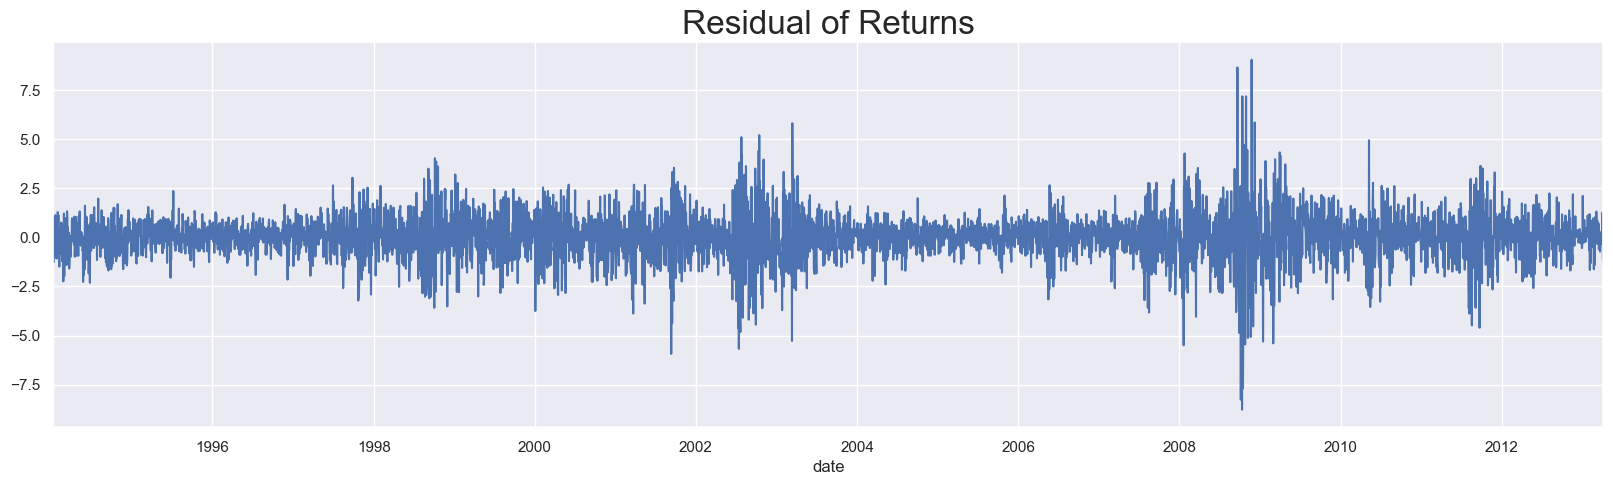

In [49]:
df.res_ret_ma_8[1:].plot(figsize = (20,5))
plt.title("Residual of Returns", size = 24)
plt.show()

In [50]:
sts.adfuller(df.res_ret_ma_8[2:])

(-70.84105756206928,
 0.0,
 0,
 5017,
 {'1%': -3.431654095870046,
  '5%': -2.8621162697870046,
  '10%': -2.5670767490325597},
 15681.85415221644)

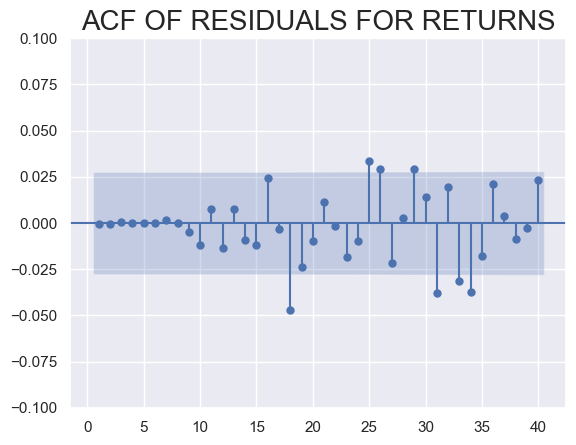

In [51]:
sgt.plot_acf(df.res_ret_ma_8[2:], zero = False, lags = 40)
plt.title("ACF OF RESIDUALS FOR RETURNS", size = 20)
plt.ylim(-0.1,0.1)
plt.show()

# normalized returns 

In [52]:
bench_ret = df.returns.iloc[1]
df['norm_ret'] = df.returns.div(bench_ret).mul(100)

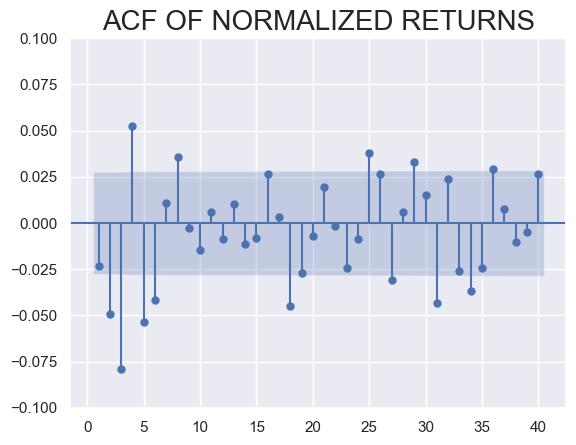

In [53]:
sgt.plot_acf(df.norm_ret[1:], zero = False, lags = 40)
plt.title("ACF OF NORMALIZED RETURNS", size = 20)
plt.ylim(-0.1,0.1)
plt.show()

In [54]:
model_norm_ret_ma_8 = ARMA(df.norm_ret[1:], order = (0,0,8))
results_norm_ret_ma_8 = model_norm_ret_ma_8.fit()
print(results_norm_ret_ma_8.summary())
#print ("LLR test: " + str(LLR_test(model_norm_ret_ar_1, model_norm_ret_ar_2)))

                               SARIMAX Results                                
Dep. Variable:               norm_ret   No. Observations:                 5019
Model:                 ARIMA(0, 0, 8)   Log Likelihood              -32249.856
Date:                Fri, 01 Mar 2024   AIC                          64519.712
Time:                        15:11:52   BIC                          64584.922
Sample:                    01-11-1994   HQIC                         64542.562
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.4123      1.943     -1.242      0.214      -6.220       1.395
ma.L1         -0.0239      0.009     -2.521      0.012      -0.042      -0.005
ma.L2         -0.0496      0.008     -6.035      0.0

In [55]:
df['res_norm_ret_ma_8'] = results_ret_ma_8.resid[1:]

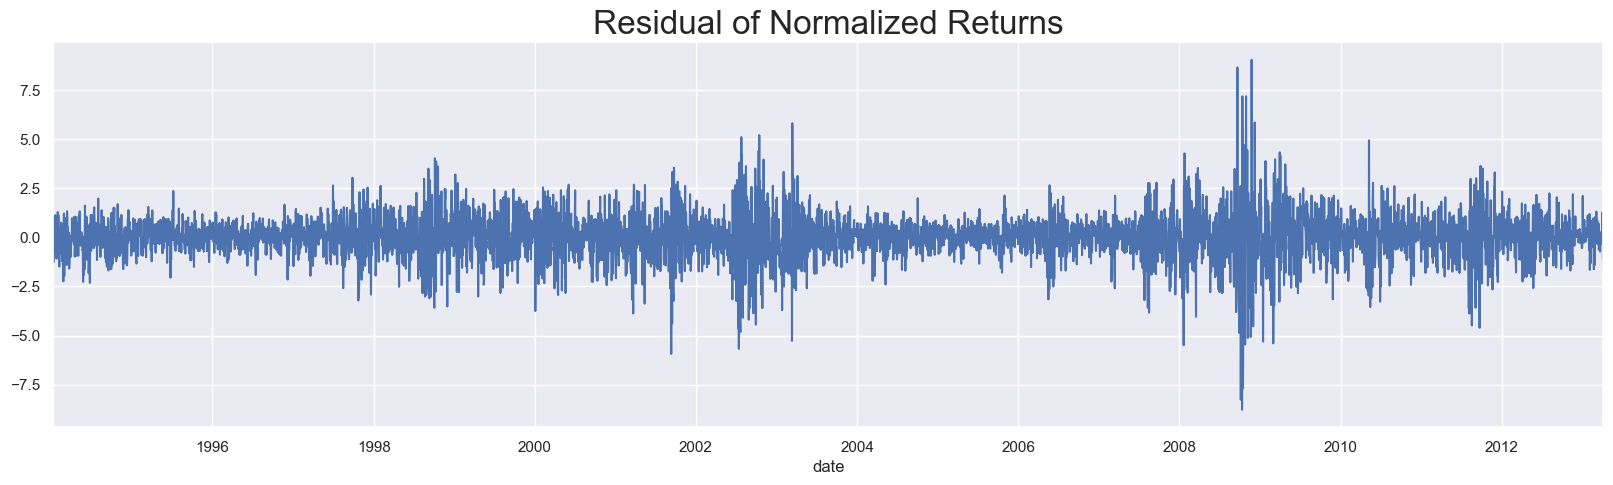

In [56]:
df.res_norm_ret_ma_8[1:].plot(figsize = (20,5))
plt.title("Residual of Normalized Returns", size = 24)
plt.show()

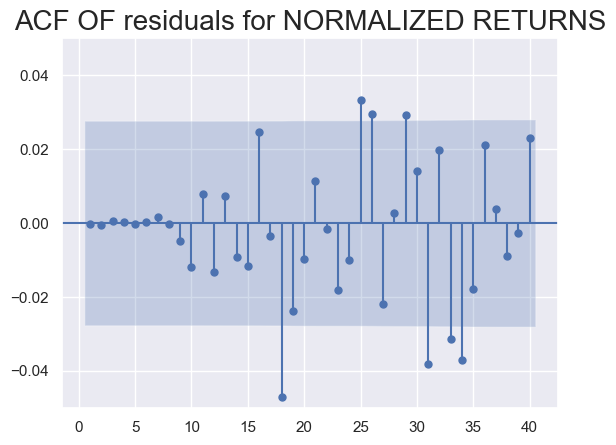

In [57]:
sgt.plot_acf(df.res_norm_ret_ma_8[2:], zero = False, lags = 40)
plt.title("ACF OF residuals for NORMALIZED RETURNS", size = 20)
plt.ylim(-0.05,0.05)
plt.show()

# MA MODEL FOR PRICE

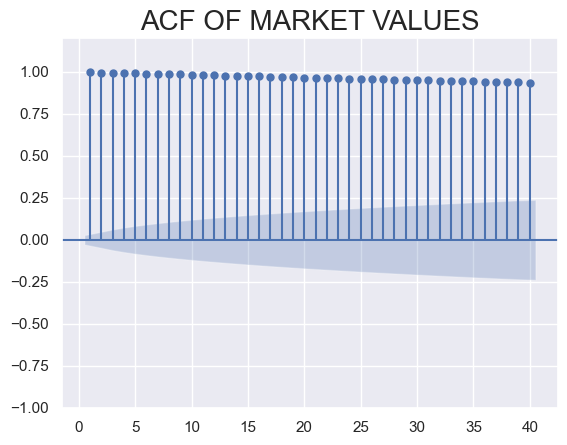

In [58]:
sgt.plot_acf(df.market_value, zero = False, lags = 40)
plt.title("ACF OF MARKET VALUES", size = 20)
plt.ylim(-1,1.2)
plt.show()

In [59]:
model_ma_1 = ARMA(df.market_value, order = (0,0,1))
results_ma_1 = model_ma_1.fit()
print(results_ma_1.summary())
#print("LLR test: " + str(LLR_test(model_ma_1, model_ma_2)))

                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 5020
Model:                 ARIMA(0, 0, 1)   Log Likelihood              -38620.627
Date:                Fri, 01 Mar 2024   AIC                          77247.253
Time:                        15:11:54   BIC                          77266.817
Sample:                    01-10-1994   HQIC                         77254.109
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5089.9580     15.768    322.812      0.000    5059.054    5120.862
ma.L1          0.9573      0.004    232.391      0.000       0.949       0.965
sigma2      2.804e+05   8087.127     34.675      0.0

# ARMA MODEL TOGETHER 

In [60]:
model_ret_ar_1_ma_1 = ARMA(df.returns[1:], order = (1,0,1))
results_ret_ar_1_ma_1= model_ret_ar_1_ma_1.fit()
print(results_ret_ar_1_ma_1.summary())
#print("LLR test: " + str(LLR_test(model_ret_ar_1_ma_1, model_ret_ar_1_ma_1)))

C:\Users\Sruja\miniconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Sruja\miniconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5019
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -7915.406
Date:                Fri, 01 Mar 2024   AIC                          15838.812
Time:                        15:11:56   BIC                          15864.896
Sample:                    01-11-1994   HQIC                         15847.952
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.015      1.292      0.196      -0.010       0.048
ar.L1          0.7647      0.045     16.976      0.000       0.676       0.853
ma.L1         -0.8139      0.040    -20.164      0.0

In [61]:
print("\nLLR test ARMA vs AR: " + str(LLR_test(model_ret_ar_1, model_ret_ar_1_ma_1)))
print("\nLLR test ARMA vs MA: " + str(LLR_test(model_ret_ma_1, model_ret_ar_1_ma_1)))

C:\Users\Sruja\miniconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Sruja\miniconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'



LLR test ARMA vs AR: 0.0


C:\Users\Sruja\miniconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Sruja\miniconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'



LLR test ARMA vs MA: 0.0


In [62]:
model_ret_ar_3_ma_3 = ARMA(df.returns[1:], order = (3,0,3))
results_ret_ar_3_ma_3= model_ret_ar_3_ma_3.fit()
print(results_ret_ar_3_ma_3.summary())
print("LLR test: " + str(LLR_test(model_ret_ar_1_ma_1, model_ret_ar_3_ma_3)))

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5019
Model:                 ARIMA(3, 0, 3)   Log Likelihood               -7892.414
Date:                Fri, 01 Mar 2024   AIC                          15800.829
Time:                        15:12:03   BIC                          15852.997
Sample:                    01-11-1994   HQIC                         15819.109
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.015      1.285      0.199      -0.010       0.048
ar.L1         -0.1884      0.068     -2.782      0.005      -0.321      -0.056
ar.L2         -0.2929      0.054     -5.375      0.0

C:\Users\Sruja\miniconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Sruja\miniconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


LLR test: 0.0


In [63]:
model_ret_ar_3_ma_2 = ARMA(df.returns[1:], order = (3,0,2))
results_ret_ar_3_ma_2 = model_ret_ar_3_ma_2.fit()
print(results_ret_ar_3_ma_2.summary())
#print("LLR test: " + str(LLR_test(model_ret_ar_3_ma_3, model_ret_ar_3_ma_2)))

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5019
Model:                 ARIMA(3, 0, 2)   Log Likelihood               -7894.627
Date:                Fri, 01 Mar 2024   AIC                          15803.254
Time:                        15:12:12   BIC                          15848.901
Sample:                    01-11-1994   HQIC                         15819.250
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.016      1.216      0.224      -0.012       0.049
ar.L1         -0.6780      0.055    -12.304      0.000      -0.786      -0.570
ar.L2         -0.5081      0.063     -8.033      0.0

In [64]:
model_ret_ar_2_ma_3 = ARMA(df.returns[1:], order = (2,0,3))
results_ret_ar_2_ma_3 = model_ret_ar_2_ma_3.fit()
print(results_ret_ar_2_ma_3.summary())
#print("LLR test: " + str(LLR_test(model_ret_ar_3_ma_3, model_ret_ar_3_ma_2)))

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5019
Model:                 ARIMA(2, 0, 3)   Log Likelihood               -7894.467
Date:                Fri, 01 Mar 2024   AIC                          15802.935
Time:                        15:12:14   BIC                          15848.581
Sample:                    01-11-1994   HQIC                         15818.930
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.015      1.228      0.219      -0.011       0.049
ar.L1         -0.5600      0.057     -9.772      0.000      -0.672      -0.448
ar.L2         -0.4168      0.066     -6.362      0.0

In [65]:
model_ret_ar_3_ma_1 = ARMA(df.returns[1:], order = (3,0,1))
results_ret_ar_3_ma_1 = model_ret_ar_3_ma_1.fit()
print(results_ret_ar_3_ma_1.summary())
print("LLR test: " + str(LLR_test(model_ret_ar_3_ma_1, model_ret_ar_3_ma_2)))

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5019
Model:                 ARIMA(3, 0, 1)   Log Likelihood               -7897.956
Date:                Fri, 01 Mar 2024   AIC                          15807.913
Time:                        15:12:15   BIC                          15847.039
Sample:                    01-11-1994   HQIC                         15821.623
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.015      1.251      0.211      -0.011       0.049
ar.L1         -0.5075      0.062     -8.159      0.000      -0.629      -0.386
ar.L2         -0.0638      0.009     -7.034      0.0

In [66]:
model_ret_ar_1_ma_3 = ARMA(df.returns[1:], order = (1,0,3))
results_ret_ar_1_ma_3 = model_ret_ar_1_ma_3.fit()
print(results_ret_ar_1_ma_3.summary())
#print("LLR test: " + str(LLR_test(model_ret_ar_3_ma_1, model_ret_ar_3_ma_2)))

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5019
Model:                 ARIMA(1, 0, 3)   Log Likelihood               -7895.722
Date:                Fri, 01 Mar 2024   AIC                          15803.445
Time:                        15:12:21   BIC                          15842.571
Sample:                    01-11-1994   HQIC                         15817.155
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.015      1.269      0.204      -0.010       0.048
ar.L1         -0.4696      0.060     -7.886      0.000      -0.586      -0.353
ma.L1          0.4471      0.060      7.444      0.0

In [67]:
print("\n ARMA(3,2): \tLL", results_ret_ar_3_ma_2.llf, "\tAIC = ", results_ret_ar_3_ma_2.aic)
print("\n ARMA(1,3): \tLL", results_ret_ar_1_ma_3.llf, "\tAIC = ", results_ret_ar_1_ma_3.aic)


 ARMA(3,2): 	LL -7894.6271040904585 	AIC =  15803.254208180917

 ARMA(1,3): 	LL -7895.722442852082 	AIC =  15803.444885704164


### ARMA(3,2) IS BETTER

# Residuals for Returns

In [68]:
df['res_ret_ar_3_ma_2'] = results_ret_ar_3_ma_2.resid[1:]

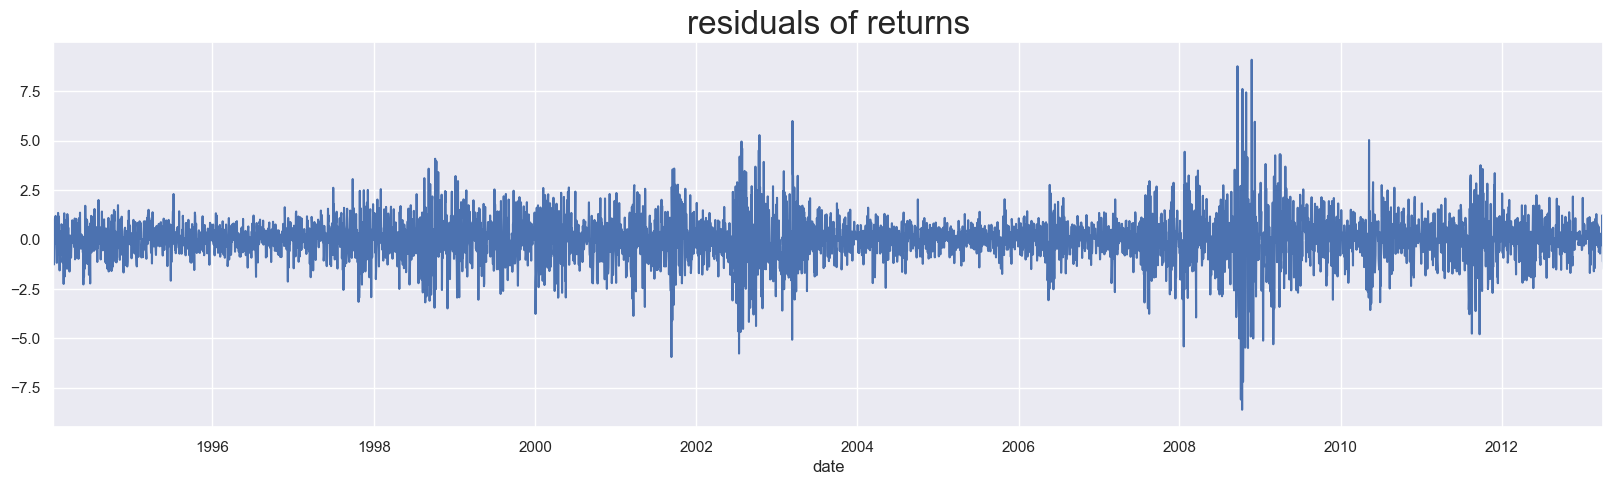

In [69]:
df.res_ret_ar_3_ma_2.plot(figsize = (20,5))
plt.title("residuals of returns", size=24)
plt.show()

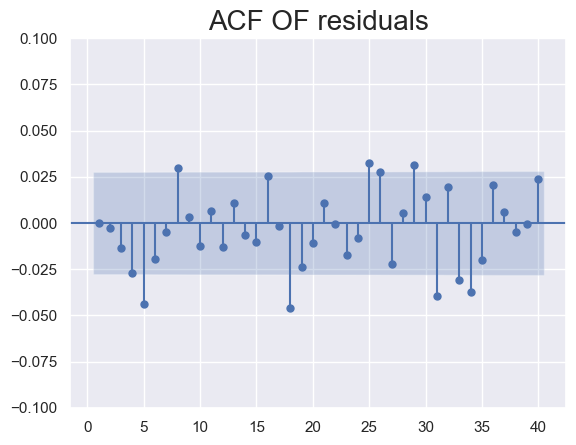

In [70]:
sgt.plot_acf(df.res_ret_ar_3_ma_2[2:], zero = False, lags = 40)
plt.title("ACF OF residuals", size = 20)
plt.ylim(-0.1,0.1)
plt.show()

### since 5th lag co-eff are still significant we can test out arma(1,5),arma(5,1)

In [71]:
model_ret_ar_5_ma_1 = ARMA(df.returns[1:], order = (5,0,1))
results_ret_ar_5_ma_1 = model_ret_ar_5_ma_1.fit()
print(results_ret_ar_5_ma_1.summary())
#print("LLR test: " + str(LLR_test(model_ret_ar_3_ma_1, model_ret_ar_3_ma_2)))

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5019
Model:                 ARIMA(5, 0, 1)   Log Likelihood               -7888.206
Date:                Fri, 01 Mar 2024   AIC                          15792.412
Time:                        16:14:29   BIC                          15844.580
Sample:                    01-11-1994   HQIC                         15810.693
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0190      0.015      1.304      0.192      -0.010       0.047
ar.L1          0.3446      0.106      3.265      0.001       0.138       0.551
ar.L2         -0.0458      0.009     -4.855      0.0

In [72]:
model_ret_ar_1_ma_5 = ARMA(df.returns[1:], order = (1,0,5))
results_ret_ar_1_ma_5 = model_ret_ar_1_ma_5.fit()
print(results_ret_ar_1_ma_5.summary())
#print("LLR test: " + str(LLR_test(model_ret_ar_3_ma_1, model_ret_ar_3_ma_2)))

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5019
Model:                 ARIMA(1, 0, 5)   Log Likelihood               -7889.868
Date:                Fri, 01 Mar 2024   AIC                          15795.735
Time:                        16:15:54   BIC                          15847.903
Sample:                    01-11-1994   HQIC                         15814.016
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0190      0.015      1.301      0.193      -0.010       0.048
ar.L1          0.3217      0.133      2.412      0.016       0.060       0.583
ma.L1         -0.3467      0.134     -2.591      0.0

In [75]:
print("\n ARMA(5,1): \tLL =", results_ret_ar_5_ma_1.llf, "\tAIC = ", results_ret_ar_5_ma_1.aic)
print("\n ARMA(1,5): \tLL =", results_ret_ar_1_ma_5.llf, "\tAIC = ", results_ret_ar_1_ma_5.aic)


 ARMA(5,1): 	LL = -7888.206004167896 	AIC =  15792.412008335792

 ARMA(1,5): 	LL = -7889.867636780869 	AIC =  15795.735273561739


### ARMA (5,1) has higher LL and lower AIC so we select arma(5,1)

# residuals for the new model

In [76]:
#del df['']

In [77]:
df['res_ret_ar_5_ma_1'] = results_ret_ar_5_ma_1.resid

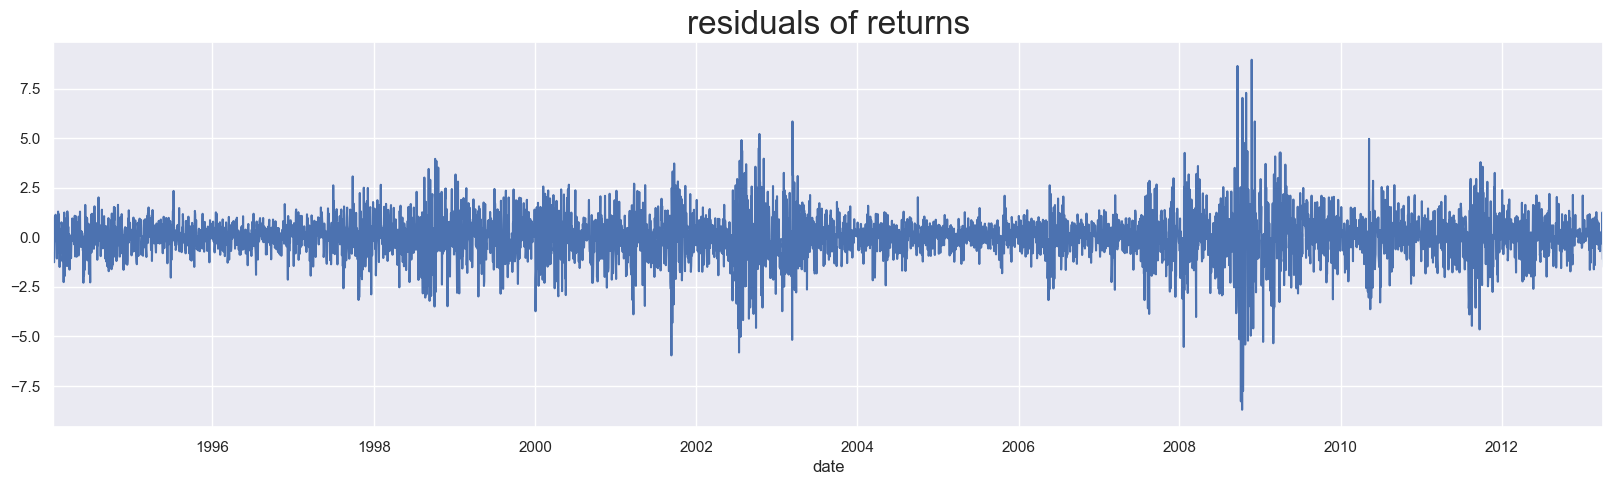

In [78]:
df.res_ret_ar_5_ma_1.plot(figsize = (20,5))
plt.title("residuals of returns", size=24)
plt.show()

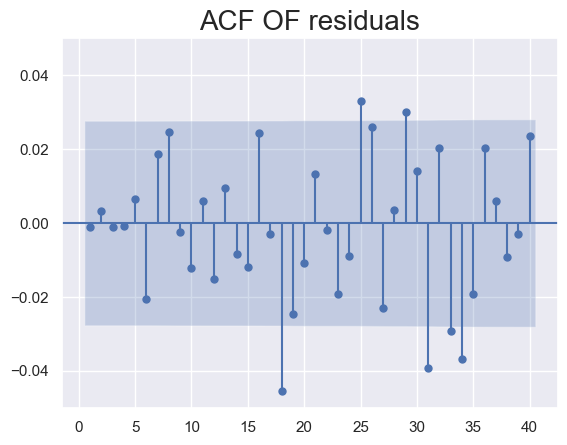

In [81]:
sgt.plot_acf(df.res_ret_ar_5_ma_1[1:], zero = False, lags = 40)
plt.title("ACF OF residuals", size = 20)
plt.ylim(-0.05,0.05)
plt.show()

# ARMA models or prices

In [82]:
model_ar_1_ma_1 = ARMA(df.market_value, order = (1,0,1))
results_ar_1_ma_1 = model_ar_1_ma_1.fit()
print(results_ar_1_ma_1.summary())
#print("LLR test: " + str(LLR_test(model_ret_ar_3_ma_1, model_ret_ar_3_ma_2)))

                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 5020
Model:                 ARIMA(1, 0, 1)   Log Likelihood              -27616.881
Date:                Fri, 01 Mar 2024   AIC                          55241.761
Time:                        18:53:18   BIC                          55267.846
Sample:                    01-10-1994   HQIC                         55250.902
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5089.9683    363.335     14.009      0.000    4377.844    5802.092
ar.L1          0.9982      0.001   1191.532      0.000       0.997       1.000
ma.L1         -0.0186      0.010     -1.892      0.0

In [83]:
df['res_ar_1_ma_1'] = results_ar_1_ma_1.resid

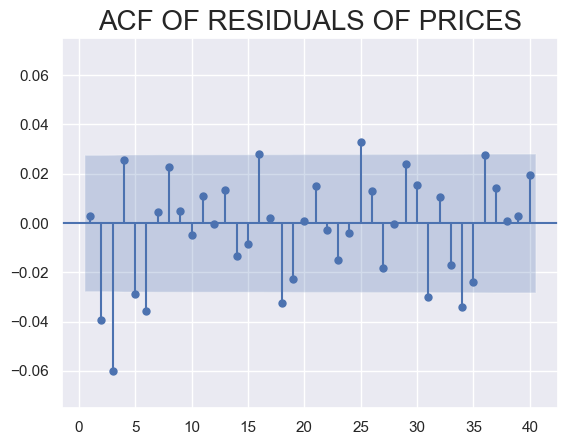

In [87]:
sgt.plot_acf(df.res_ar_1_ma_1, zero = False ,lags =40)
plt.title("ACF OF RESIDUALS OF PRICES", size =20)
plt.ylim(-0.075,0.075)
plt.show()

In [89]:
model_ar_6_ma_6 = ARMA(df.market_value, order = (6,0,6))
results_ar_6_ma_6 = model_ar_6_ma_6.fit()
print(results_ar_6_ma_6.summary())
#print("LLR test: " + str(LLR_test(model_ret_ar_3_ma_1, model_ret_ar_3_ma_2)))

C:\Users\Sruja\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 5020
Model:                 ARIMA(6, 0, 6)   Log Likelihood              -27586.274
Date:                Fri, 01 Mar 2024   AIC                          55200.549
Time:                        19:19:40   BIC                          55291.845
Sample:                    01-10-1994   HQIC                         55232.540
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5089.9682    509.525      9.990      0.000    4091.317    6088.619
ar.L1          0.7364      0.868      0.848      0.396      -0.965       2.438
ar.L2          0.2502      1.458      0.172      0.8

In [92]:
model_ar_5_ma_6 = ARMA(df.market_value, order = (5,0,6))
results_ar_5_ma_6 = model_ar_5_ma_6.fit()
print(results_ar_5_ma_6.summary())
#print("LLR test: " + str(LLR_test(model_ret_ar_3_ma_1, model_ret_ar_3_ma_2)))

C:\Users\Sruja\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 5020
Model:                 ARIMA(5, 0, 6)   Log Likelihood              -27584.894
Date:                Fri, 01 Mar 2024   AIC                          55195.789
Time:                        19:26:10   BIC                          55280.564
Sample:                    01-10-1994   HQIC                         55225.495
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5089.9682   3035.893      1.677      0.094    -860.273     1.1e+04
ar.L1          0.4838      0.786      0.615      0.538      -1.057       2.025
ar.L2         -0.1574      0.894     -0.176      0.8

In [93]:
model_ar_6_ma_1 = ARMA(df.market_value, order = (6,0,1))
results_ar_6_ma_1 = model_ar_6_ma_1.fit()
print(results_ar_6_ma_1.summary())
#print("LLR test: " + str(LLR_test(model_ret_ar_3_ma_1, model_ret_ar_3_ma_2)))

                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 5020
Model:                 ARIMA(6, 0, 1)   Log Likelihood              -27589.193
Date:                Fri, 01 Mar 2024   AIC                          55196.385
Time:                        19:27:21   BIC                          55255.076
Sample:                    01-10-1994   HQIC                         55216.951
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5089.9581    525.773      9.681      0.000    4059.462    6120.454
ar.L1          1.3929      0.157      8.848      0.000       1.084       1.701
ar.L2         -0.4377      0.154     -2.849      0.0

In [95]:
print("\n ARMA(5,6): \tLL =", results_ar_5_ma_6.llf, "\tAIC = ", results_ar_5_ma_6.aic)
print("\n ARMA(6,1): \tLL =", results_ar_6_ma_1.llf, "\tAIC = ", results_ar_6_ma_1.aic)


 ARMA(5,6): 	LL = -27584.89442603784 	AIC =  55195.78885207568

 ARMA(6,1): 	LL = -27589.19251580298 	AIC =  55196.38503160596


In [96]:
df['res_ar_5_ma_6'] = results_ar_5_ma_6.resid

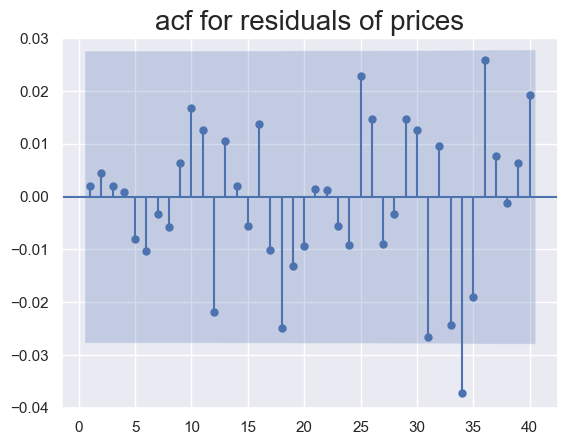

In [103]:
sgt.plot_acf(df.res_ar_5_ma_6, zero = False, lags = 40)
plt.title("acf for residuals of prices",size = 20)
plt.ylim(-.04,.03)
plt.show()

In [104]:
print("\n ARMA(5,6): \tLL =", results_ar_5_ma_6.llf, "\tAIC = ", results_ar_5_ma_6.aic)
print("\n ARMA(5,1): \tLL =", results_ret_ar_5_ma_1.llf, "\tAIC = ", results_ret_ar_5_ma_1.aic)


 ARMA(5,6): 	LL = -27584.89442603784 	AIC =  55195.78885207568

 ARMA(5,1): 	LL = -7888.206004167896 	AIC =  15792.412008335792
